### Laboratorium 3

In [58]:
#tablice wielowymiarowe w Julii
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
#size(B,1)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [59]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [60]:
#kompilacja
naive_multiplication(Asmall,Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [61]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [62]:
A=rand(1000,1000);
B=rand(1000,1000);

In [63]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
vec(A1)

4-element Array{Int64,1}:
 1
 3
 2
 4

In [64]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(A,1)
    for k=1:size(B,2)
        for i=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [65]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [66]:
@elapsed naive_multiplication(A,B)

3.161055813

In [67]:
@elapsed better_multiplication(A,B)

1.421414724

In [68]:
@elapsed A*B

0.090962804

In [69]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
using Polynomials
xs = 0:10; ys = map(x->exp(x), xs)
fit1=polyfit(xs, ys,3)


Poly(-1086.8658708490402 + 2905.5721994684973*x - 1082.7457238744728*x^2 + 100.44658880845468*x^3)

In [70]:
# obliczanie wartosci wielomianu 
fit1(1)

836.4071935534389

In [71]:
# obliczanie wartosci wielomianu (drugi sposób)
polyval(fit1, 1)

836.4071935534389

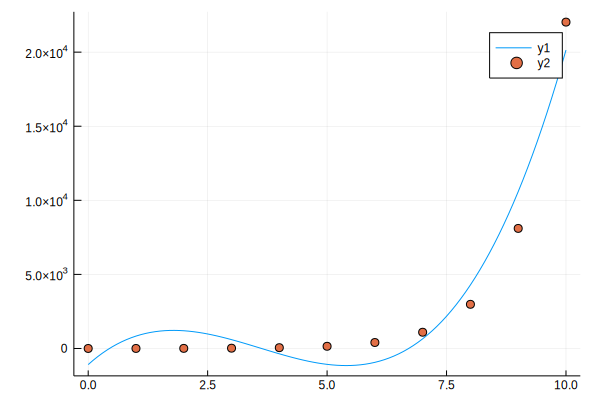

In [72]:
using Plots

# geste punkty do wyliczenia wartosci wielomianu aproksymujacego:
xd=0:0.1:10
# wykres wartosci wielomianu dla gestych punktow:
plot(xd,polyval(fit1, xd))

# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,ys)


### Zadania
 
1.Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.
 
2.Napisać w języku C:
    - naiwną metodę mnożenia macierzy (wersja 1) 
    - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
    - skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

3.Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.

4.Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 
